# Load Full ECG Dataset

In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_pickle("ecg_age_dataset.pkl")

In [3]:
df_ecg = df.iloc[:, 1:-4] # excluding age, label, id, etc. - we want the pure time series
df_ecg.head()

,0,1,2,3,4,5,6,7,8,9,...,4989,4990,4991,4992,4993,4994,4995,4996,4997,4998
0,-1,-4,2,11,8,9,8,7,-1,-6,...,-41,-39,-42,-45,-36,-25,-25,-24,-25,-23
1,-15,-23,-18,-19,-8,4,2,-3,-1,4,...,-47,-41,-44,-46,-41,-41,-47,-56,-64,-57
2,-15,-18,-20,-29,-16,-5,-7,-10,0,11,...,-5,-2,-2,-1,-5,-17,-22,-32,-39,-34
3,7,14,8,4,0,-7,-5,-2,1,1,...,44,40,44,46,39,33,36,40,45,40
4,8,8,10,20,12,7,8,8,-1,-8,...,-18,-18,-20,-22,-15,-4,-1,5,7,5


# Resample to minimize dimension

In [ ]:
import numpy as np

# Increase the step size to reduce the number of columns further
resampled_ecg = df_ecg.iloc[:, ::int(4999 / 500)].reset_index(drop=True)
if resampled_ecg.shape[1] < 500:
    resampled_ecg = pd.DataFrame(np.interp(np.linspace(0, len(df.columns)-1, num=500), 
                                           np.arange(len(df.columns)), 
                                           df.values.flatten())).T

In [20]:
resampled_ecg.columns = range(resampled_ecg.shape[1])

In [21]:
resampled_ecg.head()

,0,1,2,3,4,5,6,7,8,9,...,546,547,548,549,550,551,552,553,554,555
0,-1,-6,29,3,64,82,49,42,11,6,...,-35,-27,-47,3,286,-45,-193,-85,-36,-25
1,-15,4,17,12,85,115,108,80,37,-11,...,-76,-81,-71,-36,214,169,-245,-71,-51,-47
2,-15,11,-12,10,21,34,59,39,26,-17,...,-42,-54,-24,-39,-73,213,-52,14,-14,-22
3,7,1,-23,-7,-75,-98,-78,-61,-25,3,...,56,53,59,16,-250,-63,219,78,43,36
4,8,-8,20,-4,22,24,-6,1,-8,12,...,4,14,-11,21,179,-130,-71,-49,-11,-1


# Visualize the resampled ECG

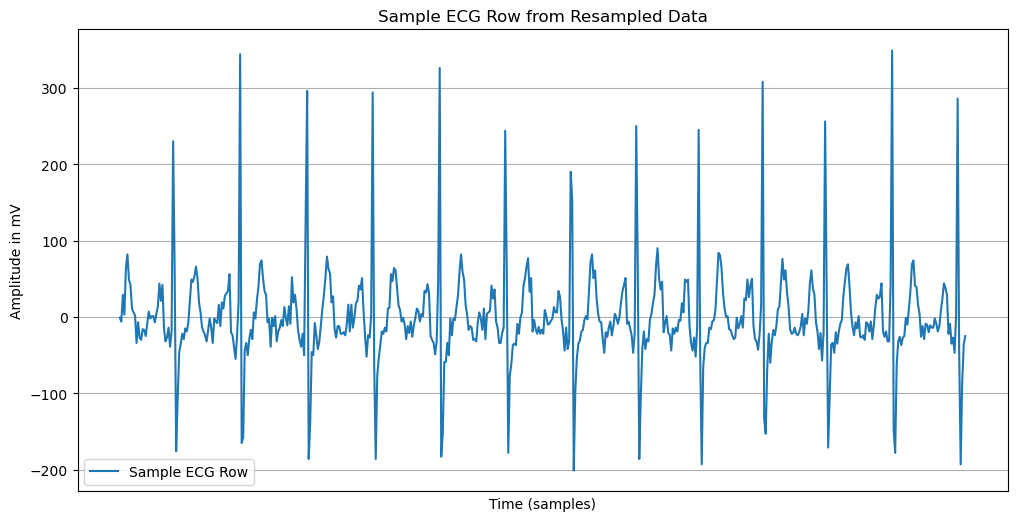

In [35]:
import matplotlib.pyplot as plt

sample_row = resampled_ecg.iloc[0]

plt.figure(figsize=(12, 6))
plt.plot(sample_row, label='Sample ECG Row')
plt.title('Sample ECG Row from Resampled Data')
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude in mV')
plt.legend()
plt.grid(True)
plt.gca().set_facecolor('white')
plt.gca().xaxis.set_ticks([])  # Remove x-axis values
#plt.savefig('ecg_resampled.png')
plt.show()

In [6]:
'''

# If large csv file
df_reader = pd.read_csv("ecg_age_dataset.csv", iterator=True, chunksize=5000)

# Initialize empty lists to store the processed chunks
processed_chunks = []
second_to_last_column_chunks = []

# Iterate over the chunks
for chunk in df_reader:
    # Process each chunk as needed
    df_chunk = chunk.iloc[:, 1:188]
    processed_chunks.append(df_chunk)
    
    # Extract the second-to-last column
    second_to_last_column = chunk.iloc[:, -2]
    second_to_last_column_chunks.append(second_to_last_column)

# Concatenate all processed chunks into a single DataFrame
df_test = pd.concat(processed_chunks, ignore_index=True)

# Concatenate the second-to-last column chunks into a separate DataFrame
df_iwant = pd.concat(second_to_last_column_chunks, ignore_index=True)

'''

'\n\n# If large csv file\ndf_reader = pd.read_csv("ecg_age_dataset.csv", iterator=True, chunksize=5000)\n\n# Initialize empty lists to store the processed chunks\nprocessed_chunks = []\nsecond_to_last_column_chunks = []\n\n# Iterate over the chunks\nfor chunk in df_reader:\n    # Process each chunk as needed\n    df_chunk = chunk.iloc[:, 1:188]\n    processed_chunks.append(df_chunk)\n    \n    # Extract the second-to-last column\n    second_to_last_column = chunk.iloc[:, -2]\n    second_to_last_column_chunks.append(second_to_last_column)\n\n# Concatenate all processed chunks into a single DataFrame\ndf_test = pd.concat(processed_chunks, ignore_index=True)\n\n# Concatenate the second-to-last column chunks into a separate DataFrame\ndf_iwant = pd.concat(second_to_last_column_chunks, ignore_index=True)\n\n'

# Min - Max Scale

In [23]:
# Create a MinMaxScaler object
scaler = MinMaxScaler()

normalized_df = pd.DataFrame(scaler.fit_transform(resampled_ecg), columns=resampled_ecg.columns)

In [24]:
normalized_df["Label"] = df.iloc[:, -2]

In [25]:
normalized_df.Label.replace([426177001, 426783006, 427084000, 164890007, 427393009], [0, 1, 2, 3, 4], inplace=True)

C:\Users\Sebastian\AppData\Local\Temp\ipykernel_68952\870100530.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  normalized_df.Label.replace([426177001, 426783006, 427084000, 164890007, 427393009], [0, 1, 2, 3, 4], inplace=True)


In [28]:
normalized_df.head()

,0,1,2,3,4,5,6,7,8,9,...,547,548,549,550,551,552,553,554,555,Label
0,0.499992,0.499916,0.500450,0.500053,0.500984,0.501259,0.553266,0.526054,0.502437,0.500099,...,0.688140,0.301993,0.709890,0.592716,0.523190,0.462744,0.457173,0.482363,0.514046,1
1,0.499779,0.500069,0.500267,0.500191,0.501305,0.501762,0.554261,0.526663,0.502836,0.499840,...,0.686069,0.301206,0.708667,0.589482,0.533862,0.459738,0.457996,0.481494,0.513183,1
2,0.499779,0.500175,0.499825,0.500160,0.500328,0.500526,0.553435,0.526006,0.502667,0.499748,...,0.687105,0.302746,0.708573,0.576593,0.536056,0.470894,0.462989,0.483637,0.514164,1
3,0.500114,0.500023,0.499657,0.499901,0.498863,0.498512,0.551125,0.524403,0.501885,0.500053,...,0.691207,0.305466,0.710298,0.568644,0.522292,0.486560,0.466749,0.486939,0.516439,1
4,0.500130,0.499886,0.500313,0.499947,0.500343,0.500374,0.552339,0.525397,0.502146,0.500191,...,0.689712,0.303172,0.710455,0.587910,0.518951,0.469796,0.459288,0.483811,0.514987,1


# Train Test Split and Export

In [32]:
from sklearn.model_selection import train_test_split

# Assuming your target variable is named 'target' in your dataframe.
# Replace 'target' with the actual name of your target column if different.
# If you don't have a target column, you can use a placeholder or remove stratification.


X = normalized_df
y = normalized_df['Label'] #Assuming you have a 'target' column in your dataframe for splitting.


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

X_train["Label"] = y_train
X_test["Label"] = y_test

# Export the two resulting dataframes

X_train.to_pickle('./ecg_train.pkl')
X_test.to_pickle('./ecg_test.pkl')